# INTRODUCTION

####  Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them. 
#### Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).

# Variable of test and train data_set
| **Variable** | **Explanation of Variable** |
| :----- | :----- |
| **campaign_id** | Unique identifier of a campaign |
| **sender** | Sender of an e-mail |
| **subject_len** | No. of characters in a subject |
| **body_len** | No. of characters in an email body |
| **mean_paragraph_len** | Average no. of characters in paragraph of an email |
| **day_of_week** | Day on which email is sent |
| **is_weekend** | Boolean flag indicating if an email is sent on weekend or not |
| **times_of_day** | Times of day when email is sent: Morning, Noon, Evening |
| **category** | Category of the product an email is related to |
| **product** | Type of the product an email is related to | 
| **no_of_CTA** | No. of Call To Actions in an email |
| **mean_CTA_len** | Average no. of characters in a CTA  |
| **is_image** | No. of images in an email |
| **is_personalised** | Boolean flag indicating if an email is personalized to the user or not |
| **is_quote** | No. of quotes in an email |
| **is_timer** | Boolean flag indicating if an email contains a timer or not |
| **is_emoticons** | No. of emoticons in an email |
| **is_discount** | Boolean flag indicating if an email contains a discount or not |
| **is_price** | Boolean flag indicating if an email contains price or not |
| **is_urgency** | Boolean flag indicating if an email contains urgency or not |
| **target_audience** | Cluster label of the target audience |
| **click_rate (Target Variable)** | Click rate of an email campaign |

# Variable of sample_submission data_set

| **Variable** | **Explanation of Variables** | 
| :----- | :----- |
| **campaign_id** | Unique Identifier of a campaign id |
| **click_rate (Target Variable)** | Click rate of an email campaign |

In [1]:
# importing all libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import missingno as msno
import seaborn as sns

In [2]:
test_file = pd.read_csv("test_Bk2wfZ3.csv")    # test_data_set.
train_file = pd.read_csv("train_F3fUq2S.csv")    # train_dataset.
sample_submission = pd.read_csv("sample_submission_LJ2N3ZQ.csv")    # sample_submission_data_set.

In [3]:
# using outer join in test_and_train dataset.

output = pd.merge(test_file,train_file, on="campaign_id",how="outer")   

In [4]:
# taking test_and_train and joining with sample_submision.

email = pd.merge(output,sample_submission, on="campaign_id", how="outer")

In [5]:
email.head()    # checking head.

,campaign_id,sender_x,subject_len_x,body_len_x,mean_paragraph_len_x,day_of_week_x,is_weekend_x,times_of_day_x,category_x,product_x,...,is_personalised_y,is_quote_y,is_timer_y,is_emoticons_y,is_discount_y,is_price_y,is_urgency_y,target_audience_y,click_rate_x,click_rate_y
0,1889,3.0,61.0,12871.0,11.0,6.0,1.0,Noon,6.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
1,1890,3.0,54.0,2569.0,256.0,5.0,1.0,Morning,2.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
2,1891,3.0,88.0,1473.0,78.0,4.0,0.0,Evening,2.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
3,1892,3.0,88.0,1473.0,78.0,3.0,0.0,Evening,2.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
4,1893,3.0,78.0,9020.0,29.0,3.0,0.0,Noon,6.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454


In [6]:
email.tail()    # checking tail.

,campaign_id,sender_x,subject_len_x,body_len_x,mean_paragraph_len_x,day_of_week_x,is_weekend_x,times_of_day_x,category_x,product_x,...,is_personalised_y,is_quote_y,is_timer_y,is_emoticons_y,is_discount_y,is_price_y,is_urgency_y,target_audience_y,click_rate_x,click_rate_y
2645,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.350746,NaN
2646,1885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.004728,NaN
2647,1886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.008289,NaN
2648,1887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.012014,NaN
2649,1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.003644,NaN


# Basic Exploration of the data

In [7]:
email.shape    #  so, there are 2650 rows and 43 columns.

(2650, 43)

In [8]:
email.drop_duplicates()    # removing duplicated values.

,campaign_id,sender_x,subject_len_x,body_len_x,mean_paragraph_len_x,day_of_week_x,is_weekend_x,times_of_day_x,category_x,product_x,...,is_personalised_y,is_quote_y,is_timer_y,is_emoticons_y,is_discount_y,is_price_y,is_urgency_y,target_audience_y,click_rate_x,click_rate_y
0,1889,3.0,61.0,12871.0,11.0,6.0,1.0,Noon,6.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
1,1890,3.0,54.0,2569.0,256.0,5.0,1.0,Morning,2.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
2,1891,3.0,88.0,1473.0,78.0,4.0,0.0,Evening,2.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
3,1892,3.0,88.0,1473.0,78.0,3.0,0.0,Evening,2.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
4,1893,3.0,78.0,9020.0,29.0,3.0,0.0,Noon,6.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.350746,NaN
2646,1885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.004728,NaN
2647,1886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.008289,NaN
2648,1887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.012014,NaN


In [9]:
email.duplicated()  # no duplication here.

0       False
1       False
2       False
3       False
4       False
        ...  
2645    False
2646    False
2647    False
2648    False
2649    False
Length: 2650, dtype: bool

In [10]:
email.nunique()    # uniqness of the column.

campaign_id             2650
sender_x                  12
subject_len_x            129
body_len_x               697
mean_paragraph_len_x      83
day_of_week_x              7
is_weekend_x               2
times_of_day_x             3
category_x                16
product_x                 39
no_of_CTA_x               25
mean_CTA_len_x            59
is_image_x                 5
is_personalised_x          2
is_quote_x                 6
is_timer_x                 1
is_emoticons_x             7
is_discount_x              2
is_price_x                 4
is_urgency_x               2
target_audience_x         16
sender_y                  12
subject_len_y            170
body_len_y              1568
mean_paragraph_len_y     121
day_of_week_y              7
is_weekend_y               2
times_of_day_y             3
category_y                16
product_y                 43
no_of_CTA_y               40
mean_CTA_len_y            79
is_image_y                 6
is_personalised_y          2
is_quote_y    

In [11]:
email.info()    # checking data_type and null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 2649
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_id           2650 non-null   int64  
 1   sender_x              762 non-null    float64
 2   subject_len_x         762 non-null    float64
 3   body_len_x            762 non-null    float64
 4   mean_paragraph_len_x  762 non-null    float64
 5   day_of_week_x         762 non-null    float64
 6   is_weekend_x          762 non-null    float64
 7   times_of_day_x        762 non-null    object 
 8   category_x            762 non-null    float64
 9   product_x             762 non-null    float64
 10  no_of_CTA_x           762 non-null    float64
 11  mean_CTA_len_x        762 non-null    float64
 12  is_image_x            762 non-null    float64
 13  is_personalised_x     762 non-null    float64
 14  is_quote_x            762 non-null    float64
 15  is_timer_x           

In [12]:
email.describe(include="all")    # summary of the dataset.

,campaign_id,sender_x,subject_len_x,body_len_x,mean_paragraph_len_x,day_of_week_x,is_weekend_x,times_of_day_x,category_x,product_x,...,is_personalised_y,is_quote_y,is_timer_y,is_emoticons_y,is_discount_y,is_price_y,is_urgency_y,target_audience_y,click_rate_x,click_rate_y
count,2650.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762,762.000000,762.000000,...,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,7.620000e+02
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evening,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1325.500000,4.249344,86.509186,14184.263780,33.185039,2.850394,0.209974,NaN,9.590551,17.872703,...,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888,4.345431e-02
std,765.133431,3.131927,30.586394,7179.056026,26.889537,1.791697,0.407557,NaN,5.314579,11.786908,...,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223,6.735148e-16
min,1.000000,1.000000,11.000000,23.000000,4.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.345431e-02
25%,663.250000,3.000000,68.000000,9697.250000,20.000000,1.000000,0.000000,NaN,6.000000,9.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413,4.345431e-02
50%,1325.500000,3.000000,83.000000,12740.500000,27.500000,3.000000,0.000000,NaN,10.000000,13.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686,4.345431e-02
75%,1987.750000,3.000000,98.000000,16746.000000,39.000000,4.000000,0.000000,NaN,15.000000,26.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589,4.345431e-02


<AxesSubplot:>

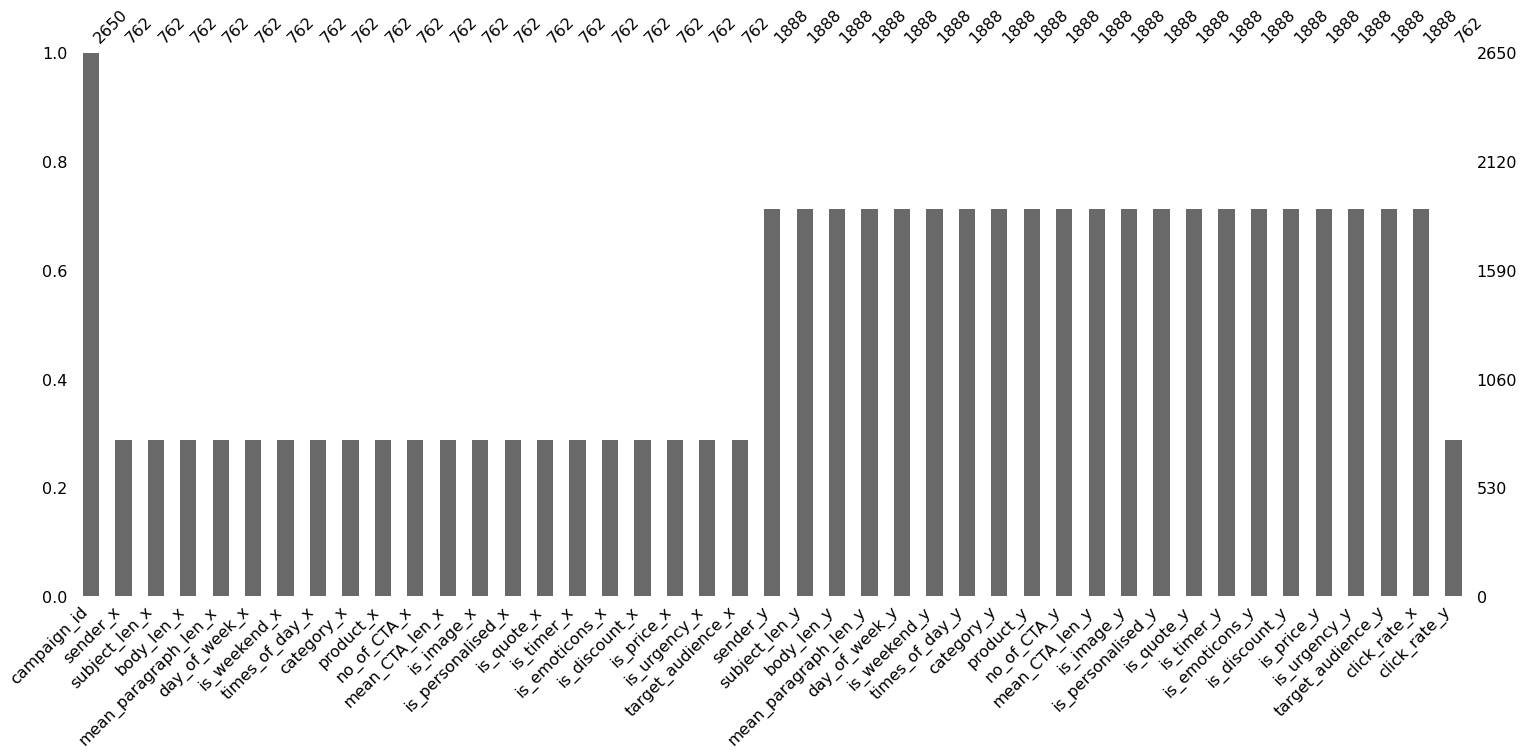

In [13]:
msno.bar(email)    # checking missing values in columns
                   # here is so many missingness and null values.

In [14]:
email.isnull().sum()    # checking the sum of missing data.

campaign_id                0
sender_x                1888
subject_len_x           1888
body_len_x              1888
mean_paragraph_len_x    1888
day_of_week_x           1888
is_weekend_x            1888
times_of_day_x          1888
category_x              1888
product_x               1888
no_of_CTA_x             1888
mean_CTA_len_x          1888
is_image_x              1888
is_personalised_x       1888
is_quote_x              1888
is_timer_x              1888
is_emoticons_x          1888
is_discount_x           1888
is_price_x              1888
is_urgency_x            1888
target_audience_x       1888
sender_y                 762
subject_len_y            762
body_len_y               762
mean_paragraph_len_y     762
day_of_week_y            762
is_weekend_y             762
times_of_day_y           762
category_y               762
product_y                762
no_of_CTA_y              762
mean_CTA_len_y           762
is_image_y               762
is_personalised_y        762
is_quote_y    

In [15]:
# email missing checking in boolean
email_missing = email.isnull()

# percentage of missing data.
email_missing.mean()*100

campaign_id              0.000000
sender_x                71.245283
subject_len_x           71.245283
body_len_x              71.245283
mean_paragraph_len_x    71.245283
day_of_week_x           71.245283
is_weekend_x            71.245283
times_of_day_x          71.245283
category_x              71.245283
product_x               71.245283
no_of_CTA_x             71.245283
mean_CTA_len_x          71.245283
is_image_x              71.245283
is_personalised_x       71.245283
is_quote_x              71.245283
is_timer_x              71.245283
is_emoticons_x          71.245283
is_discount_x           71.245283
is_price_x              71.245283
is_urgency_x            71.245283
target_audience_x       71.245283
sender_y                28.754717
subject_len_y           28.754717
body_len_y              28.754717
mean_paragraph_len_y    28.754717
day_of_week_y           28.754717
is_weekend_y            28.754717
times_of_day_y          28.754717
category_y              28.754717
product_y     

- lot's of columns contains 71% missing data which is not good for the data model.
- so, i am removing that columns contain 71% missing data and it is not usefull for me for further analysis.

<AxesSubplot:>

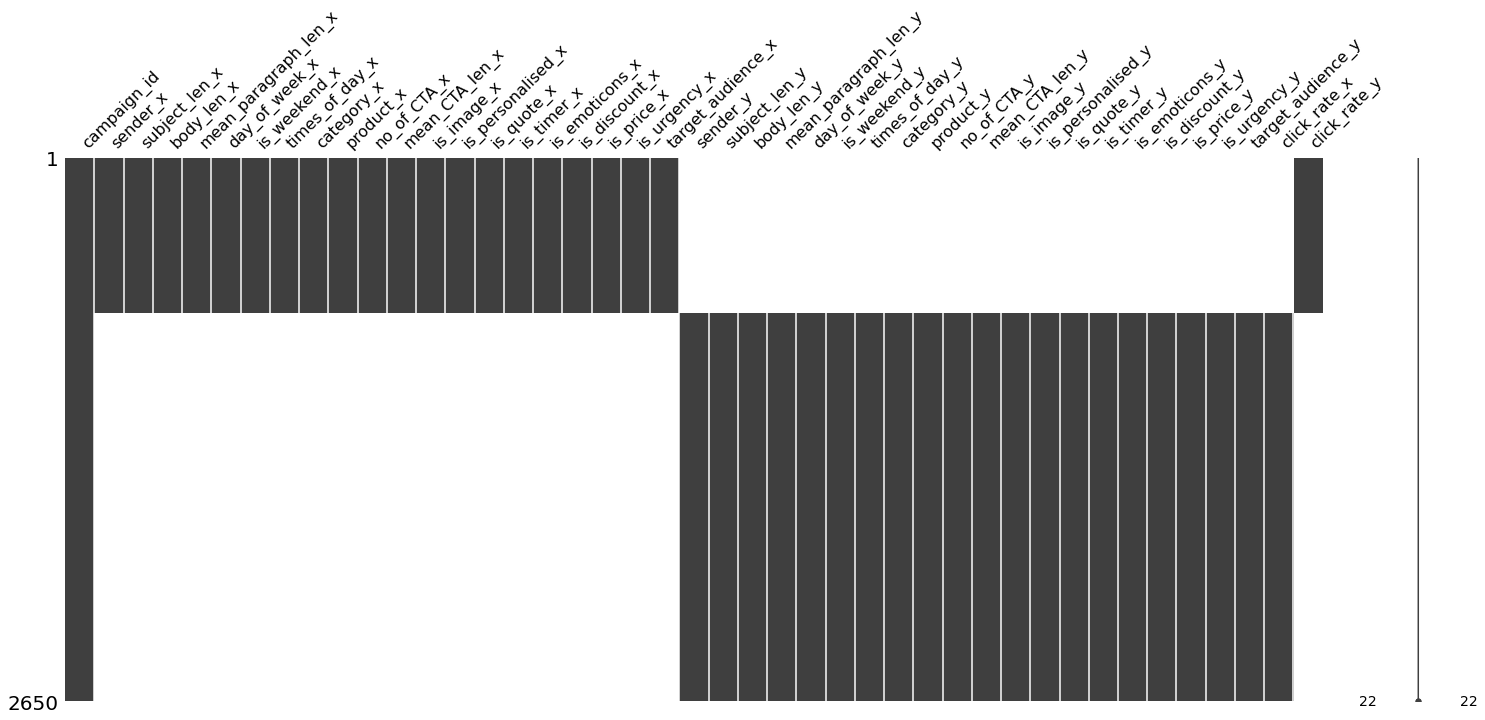

In [16]:
msno.matrix(email)     # checking patterns.
                       # blank value shows missing data

<AxesSubplot:>

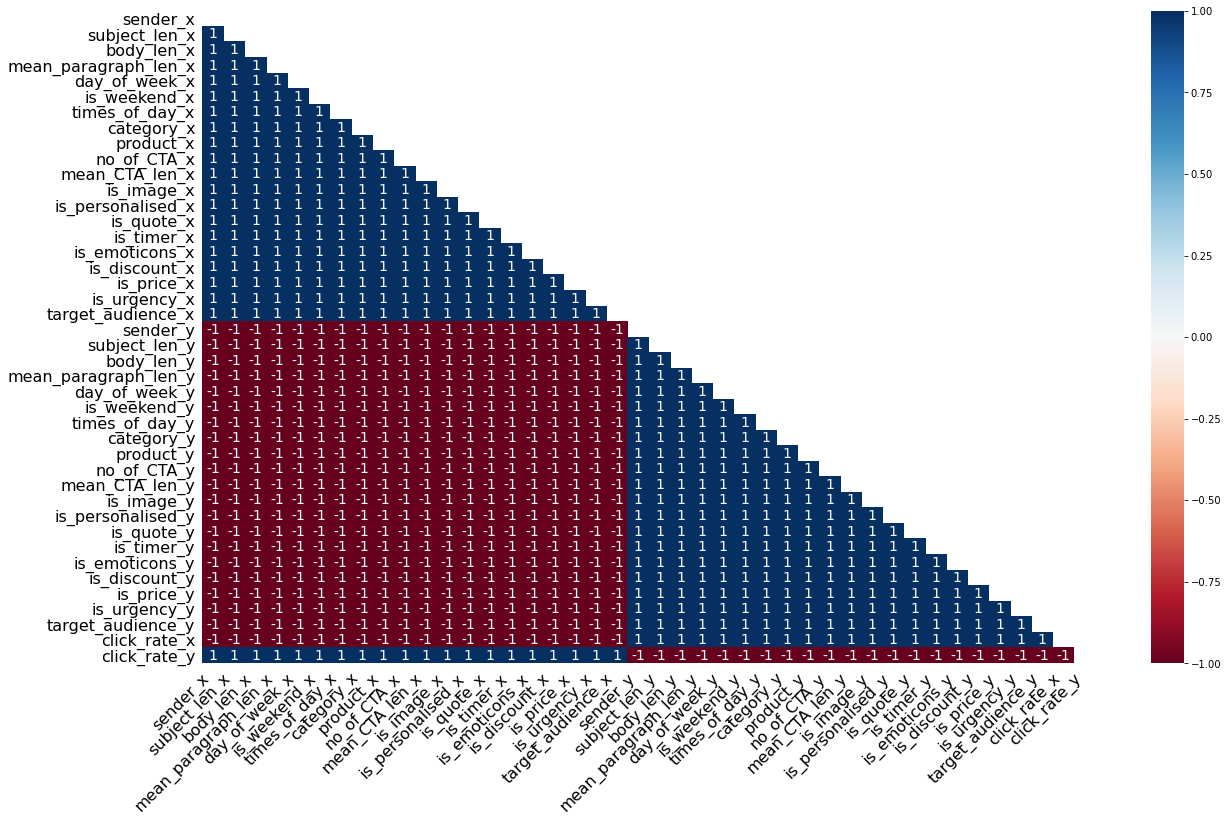

In [17]:
msno.heatmap(email)    # checking the coorealtion of missing data.

- dark blue: shows positive coorelation.
- dark brown shade: shows negative coorelation.

# Pair-wise deletion

In [18]:
# dropping some columns because they contains 78% missing data.
# which is not useful.
email = email.drop(["sender_x","subject_len_x","body_len_x","mean_paragraph_len_x","day_of_week_x","is_weekend_x","times_of_day_x","category_x","product_x","no_of_CTA_x","mean_CTA_len_x","is_image_x","is_personalised_x","is_quote_x","is_timer_x","is_emoticons_x","is_discount_x","is_price_x","is_urgency_x","target_audience_x","click_rate_y"], axis=1)

In [19]:
# dropping all nan values if "any" column contains then the row will get delete.
email = email.dropna(how="any")

<AxesSubplot:>

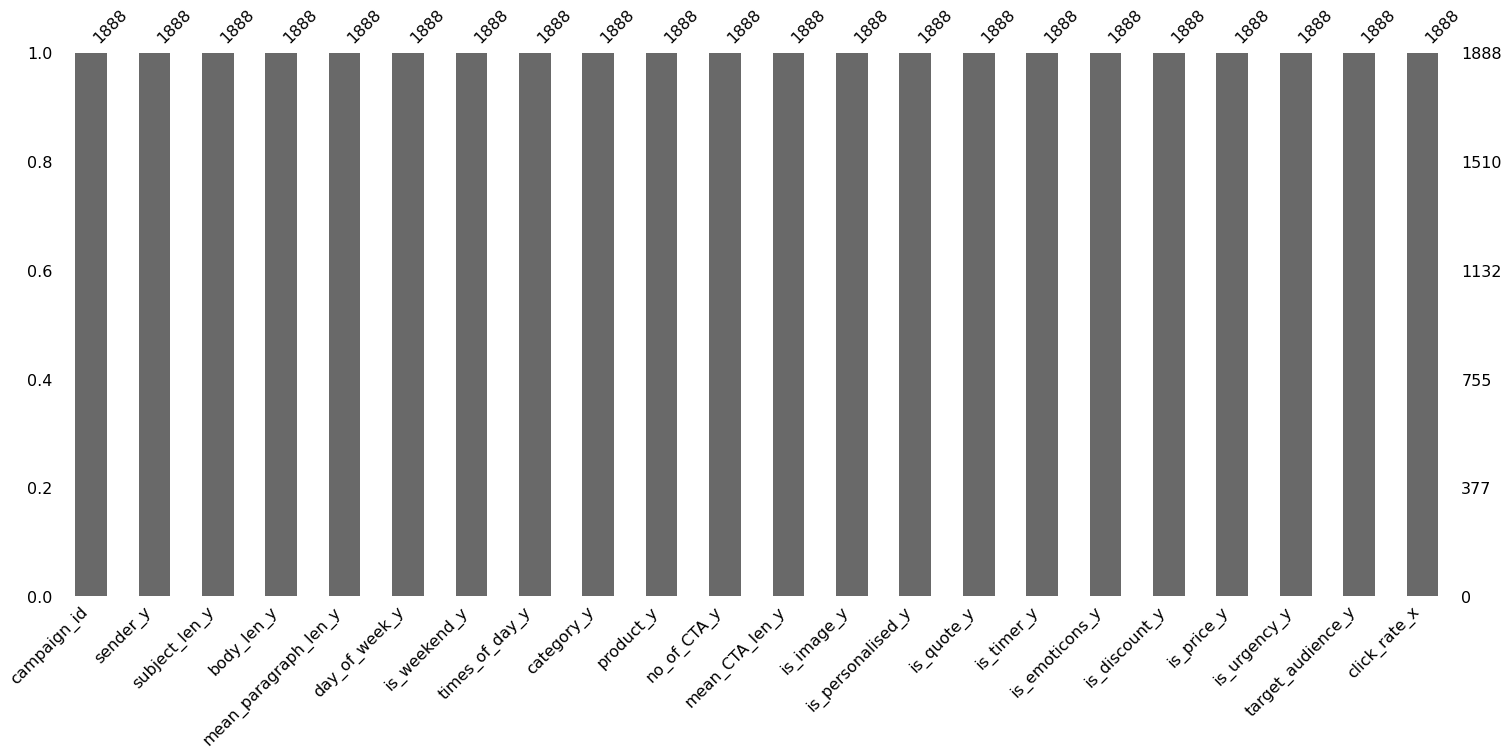

In [20]:
msno.bar(email)    # again checking missing data.
                   # so, there is no null values now.

<AxesSubplot:>

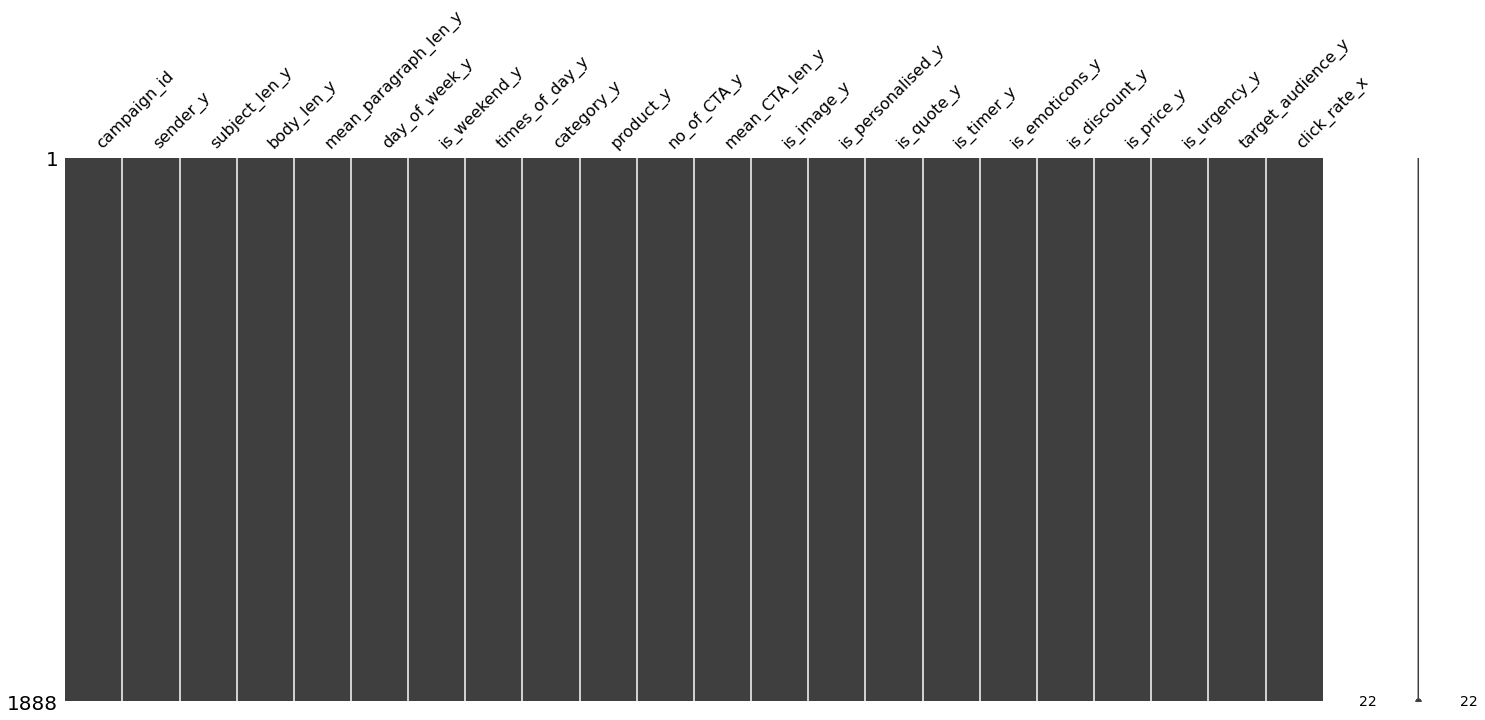

In [21]:
msno.matrix(email)    # checking patterns of null values.
                      # here it is all fine for further analysis.

# Exploring features of data

In [22]:
# checking how many times email send it on weekend.
email.is_weekend_y.value_counts()

0.0    1511
1.0     377
Name: is_weekend_y, dtype: int64

#### 377 times sent but the no. is less.

In [23]:
# personalised email.
email.is_personalised_y.value_counts()

0.0    1781
1.0     107
Name: is_personalised_y, dtype: int64

#### 107 personalised email is also less.
#### in this we need to check why it is very less.

In [24]:
# checking the timer.
email.is_timer_y.value_counts()

0.0    1888
Name: is_timer_y, dtype: int64

##### so, they have not applied the timing on email.

In [25]:
# email contains discount or not
email.is_discount_y.value_counts()

0.0    1813
1.0      75
Name: is_discount_y, dtype: int64

#### they have sent email with discount to 75 people. which is less to target and attract the huge audiance.

In [26]:
# target audience.
email.target_audience_y.value_counts()

12.0    1169
14.0     175
10.0     136
16.0     132
15.0      61
7.0       56
1.0       50
2.0       20
5.0       16
6.0       14
11.0      12
4.0       10
13.0      10
8.0        9
3.0        9
9.0        6
0.0        3
Name: target_audience_y, dtype: int64

# Numerical columns

In [27]:
sns.set_palette("mako")    # calling mako palette.

C:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


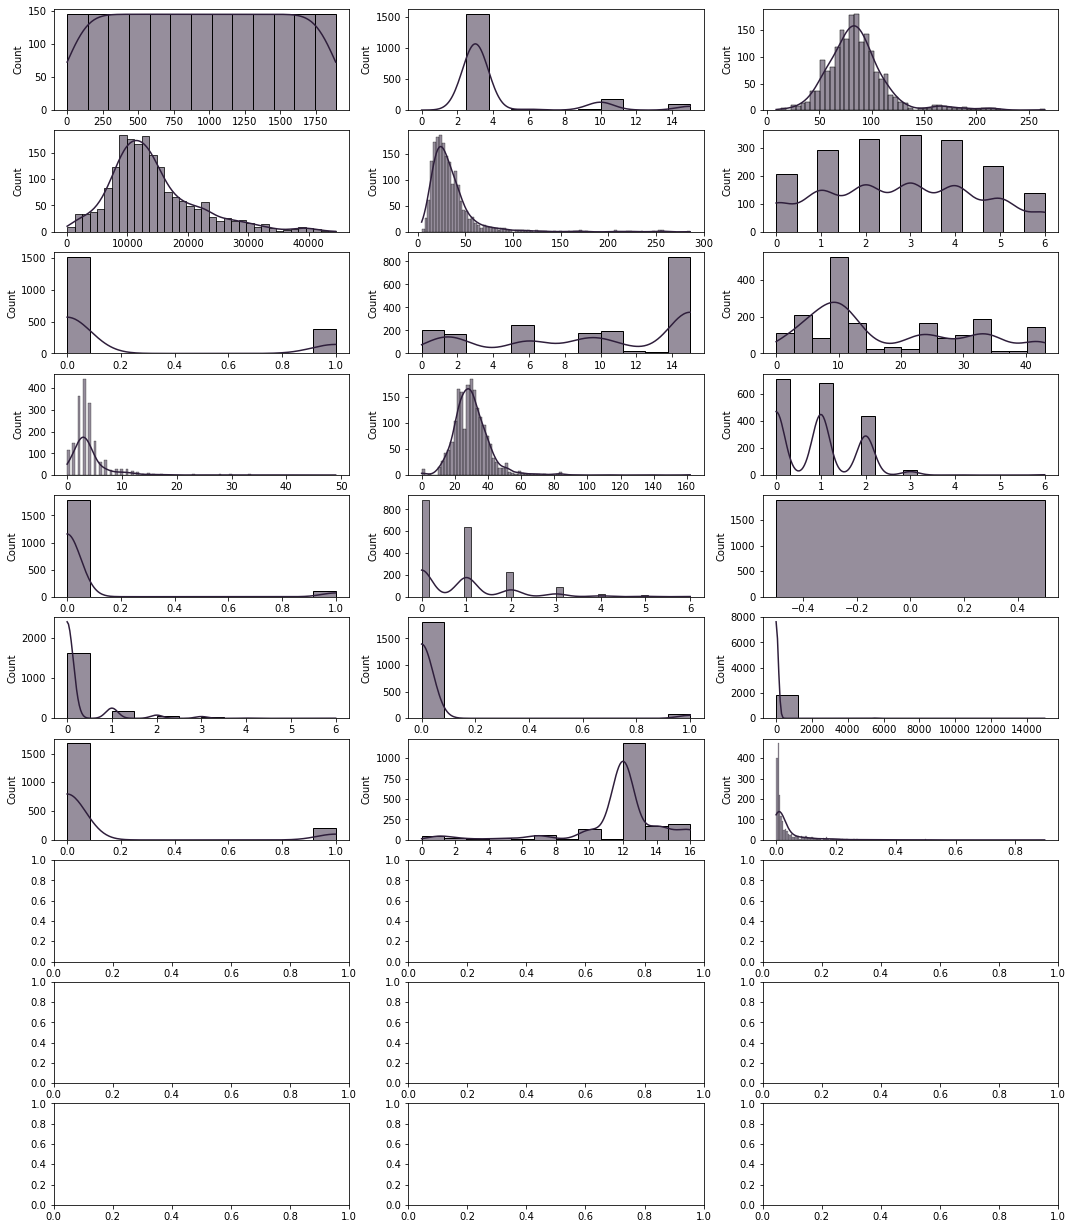

In [28]:
# checking the skewness of all.

_,ax= plt.subplots(10,3, figsize=(18,22))
numericals=email.select_dtypes(include="number").columns
for i in range(len(numericals)):
    sns.histplot(data=email[numericals[i]],ax=ax[i//3][i%3], kde=True, palette="mako")

- all the data is skewed.
- not any data is normally distributed.
- there is outliers that it is affecting the model.

# Target variable

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'relative frequency by click')

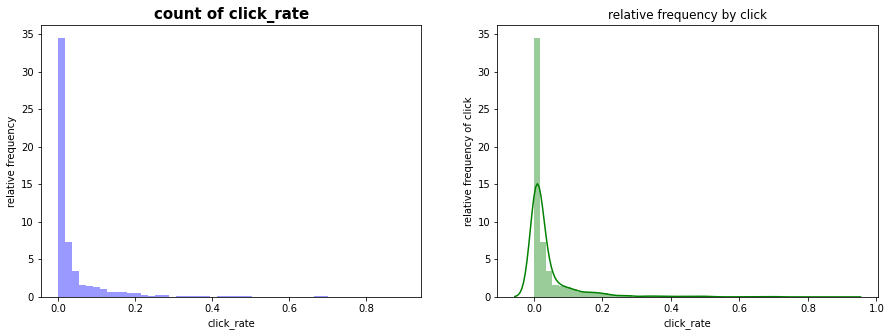

In [29]:
# checking frequency of target variable which is "click rate"

fig, ax= plt.subplots(1,2, figsize=(15,5))

sns.distplot(email["click_rate_x"], norm_hist=True, kde=False, ax=ax[0], color="blue")
ax[0].set_xlabel("click_rate")
ax[0].set_ylabel("relative frequency")
ax[0].set_title("count of click_rate", size=15, weight="bold")

sns.distplot(email["click_rate_x"], kde=True, ax=ax[1], color="green")
ax[1].set_xlabel("click_rate")
ax[1].set_ylabel("relative frequency of click")
ax[1].set_title("relative frequency by click")

- click rate from 0 to 0.2 and 0.2 to 0.8.
- click rate of 0 is very high.
- on 0.1 and 0.2 people have clicked but relative frequency is very less
- "we need to focus the exact demand of the people. we need to target the exact customer"

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'no_of_CTA_y'}, ylabel='no_of_CTA_y'>

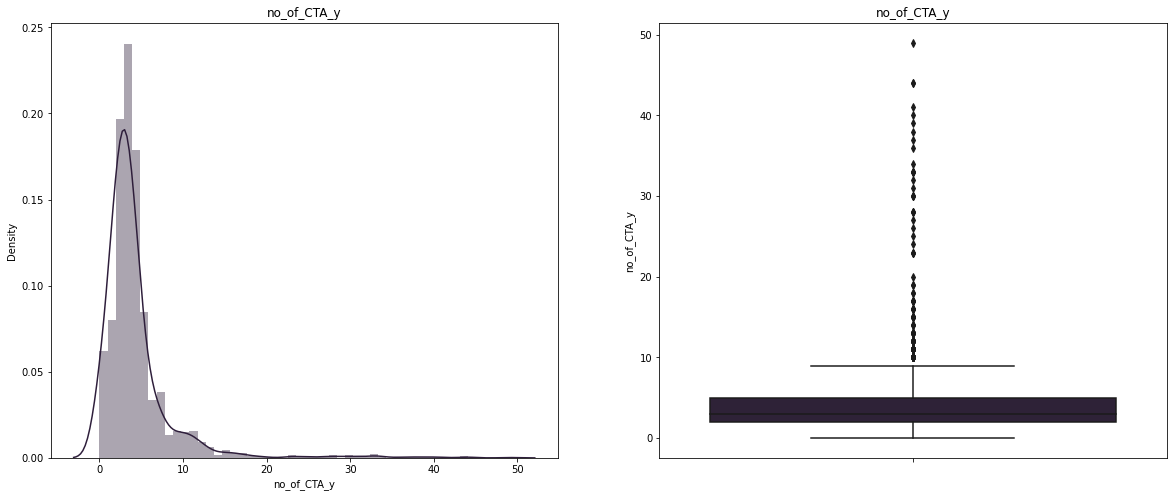

In [30]:
# checking the distribution and density of no_of_CTA_y.

# distplot.
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("no_of_CTA_y")
sns.distplot(email.no_of_CTA_y)

# boxplot.
plt.subplot(1,2,2)
plt.title("no_of_CTA_y")
sns.boxplot(y=email.no_of_CTA_y)

- no. of CTA click from 0 to 20 but 20 is outlier.
- if we look in boxplot, the median is 4 which is very less. we need to check it is related with the people interest or not.
- in this most of the people are not interested to CTA by email.

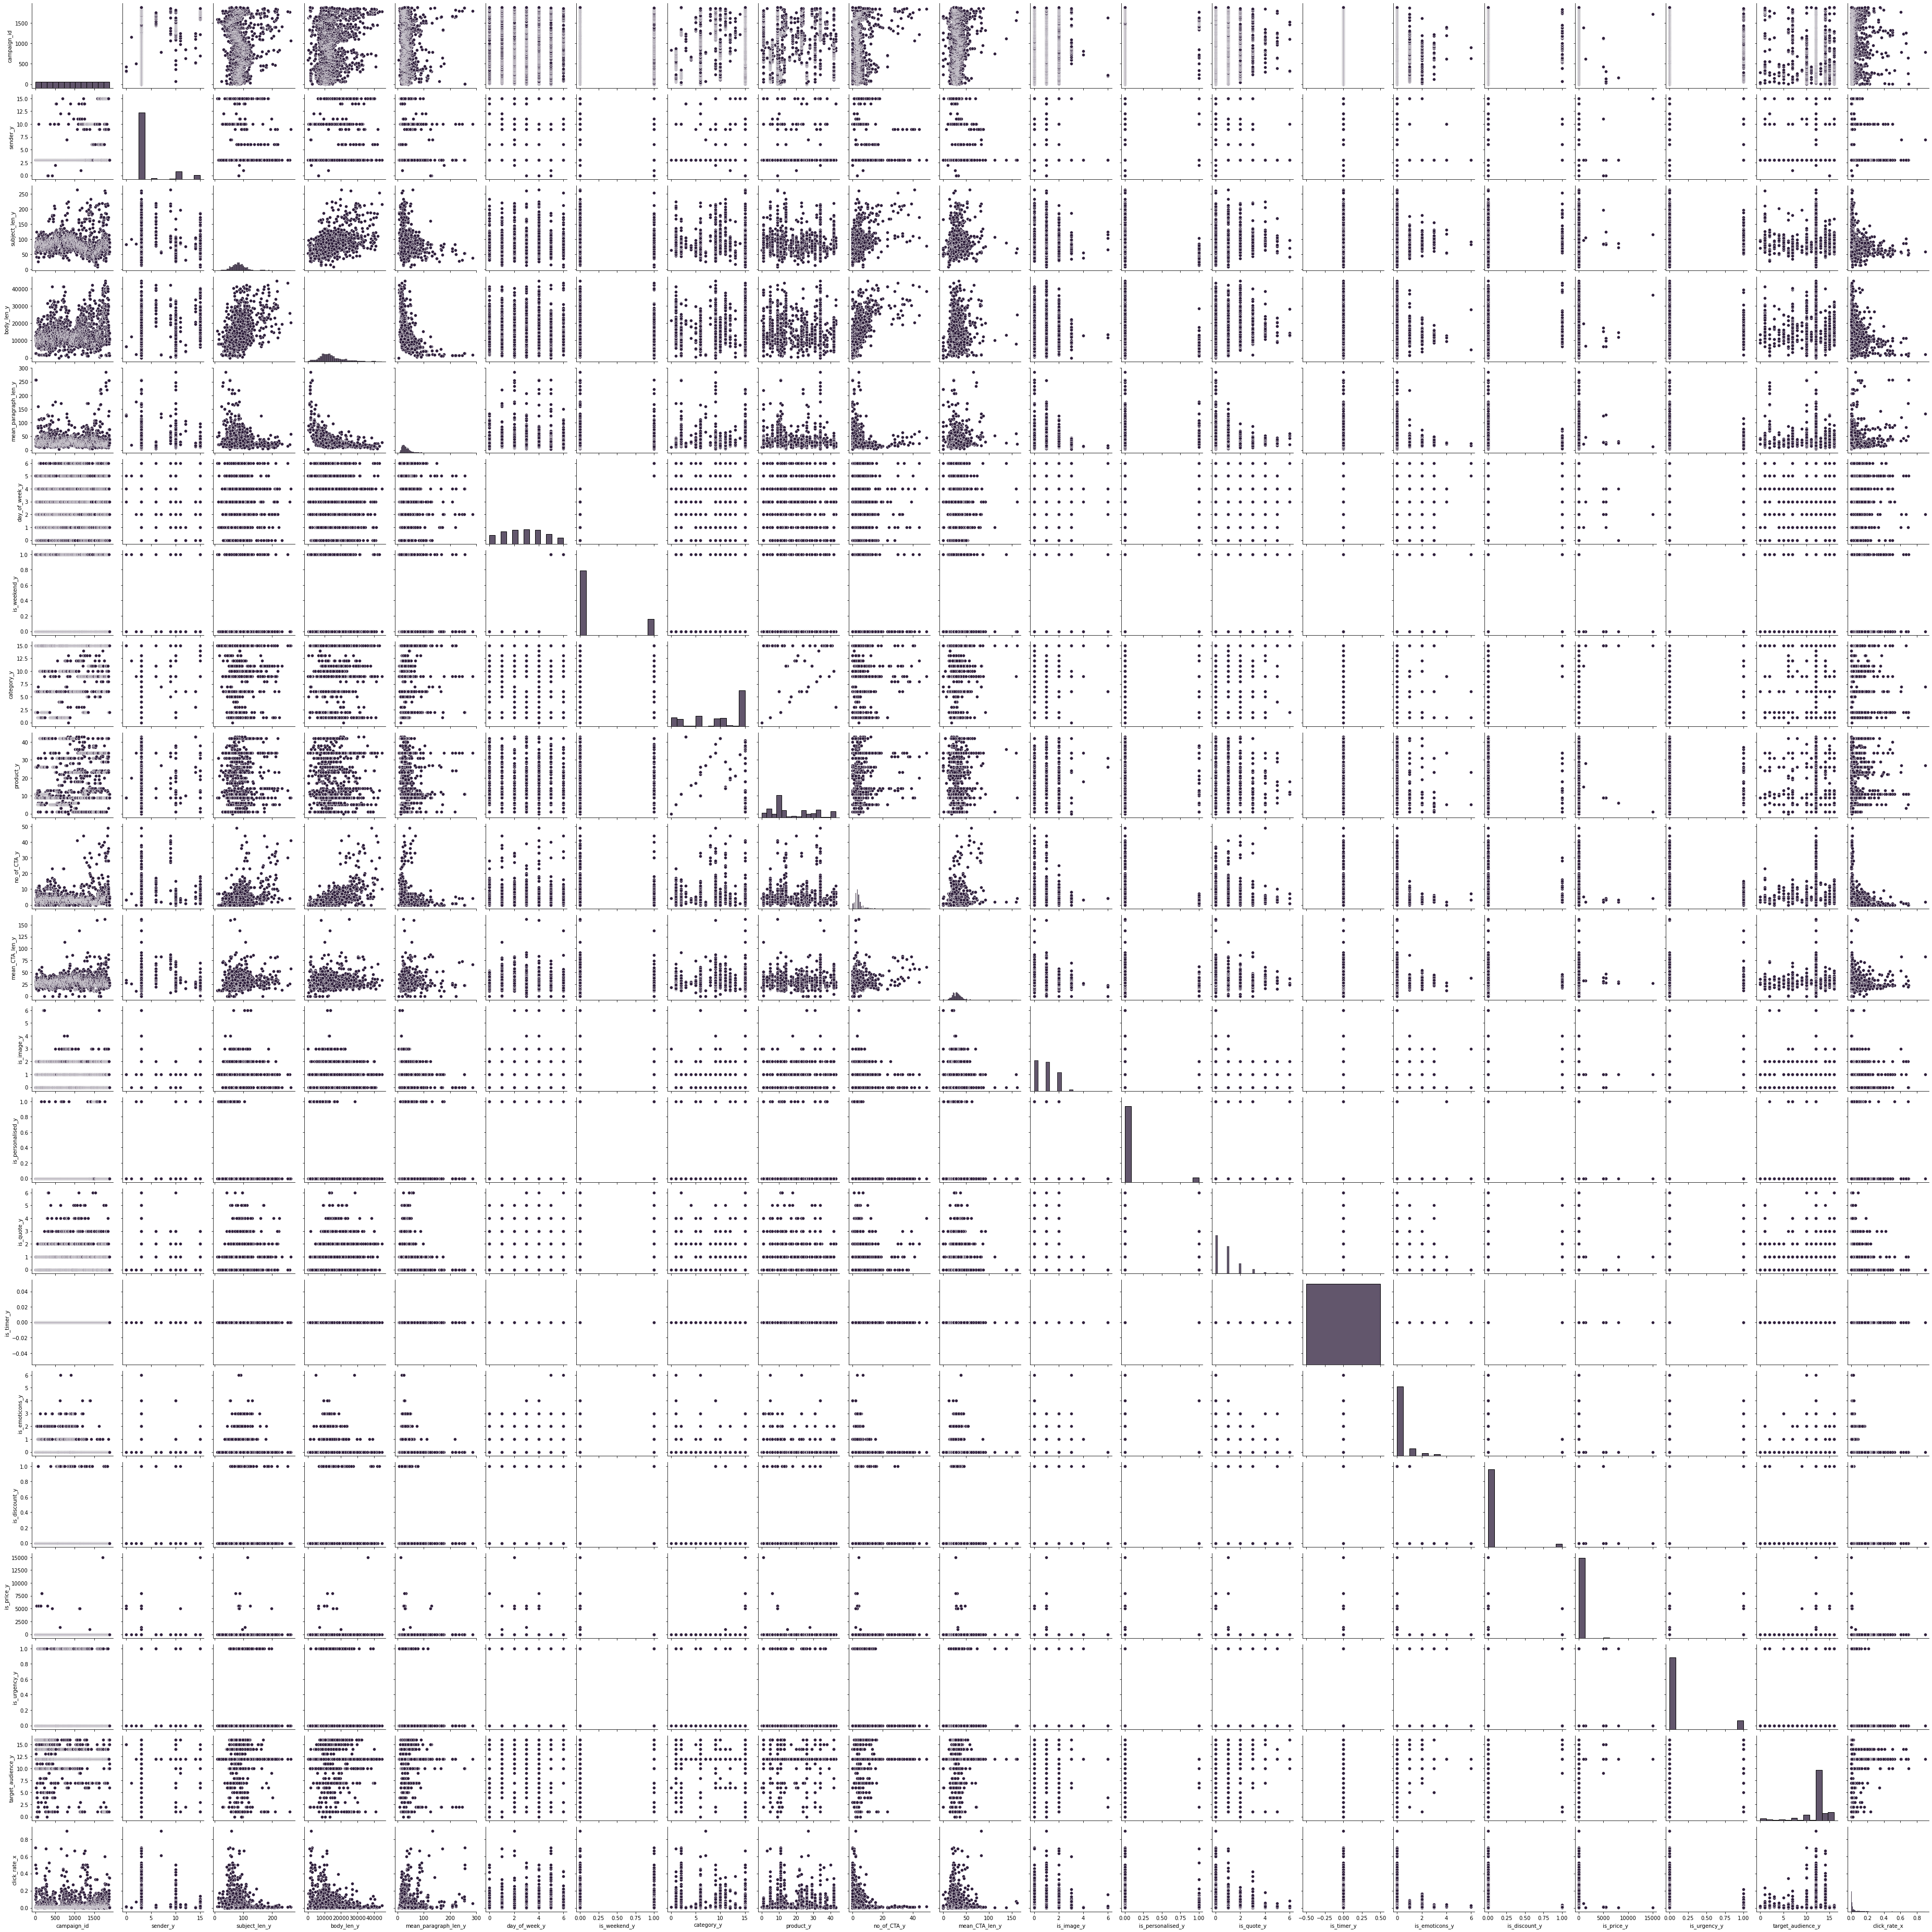

In [32]:
sns.pairplot(email)    # checking the relation of columns.

# Examining numerical columns

In [33]:
email_numeric=email.select_dtypes(include=['float64','int64'])
email_numeric.head()

,campaign_id,sender_y,subject_len_y,body_len_y,mean_paragraph_len_y,day_of_week_y,is_weekend_y,category_y,product_y,no_of_CTA_y,...,is_image_y,is_personalised_y,is_quote_y,is_timer_y,is_emoticons_y,is_discount_y,is_price_y,is_urgency_y,target_audience_y,click_rate_x
762,1,3.0,76.0,10439.0,39.0,5.0,1.0,6.0,26.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.103079
763,2,3.0,54.0,2570.0,256.0,5.0,1.0,2.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.700000
764,3,3.0,59.0,12801.0,16.0,5.0,1.0,2.0,11.0,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.002769
765,4,3.0,74.0,11037.0,30.0,4.0,0.0,15.0,9.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.010868
766,5,3.0,80.0,10011.0,27.0,5.0,1.0,6.0,26.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,0.142826


# Multivariate analysis

<AxesSubplot:>

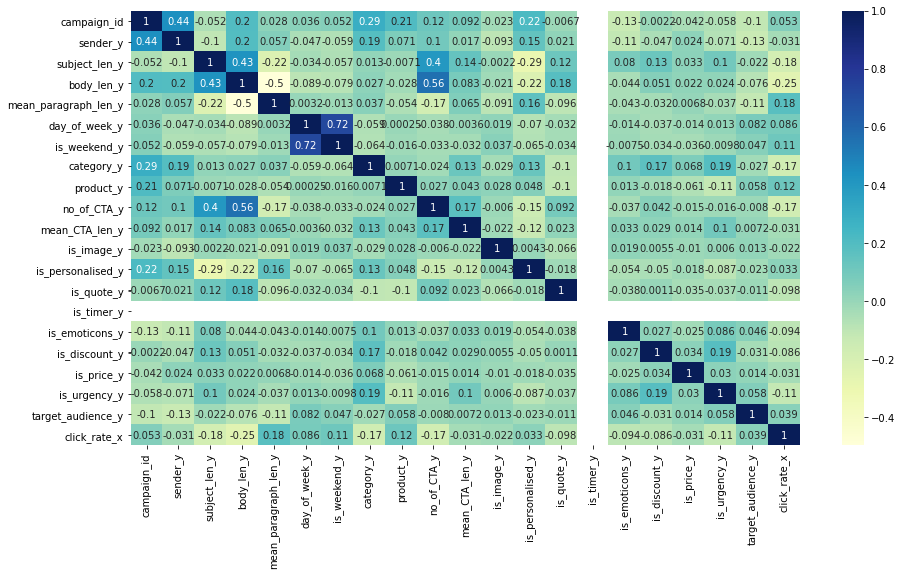

In [37]:
corr=email_numeric.corr() # pearson correlation

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

<AxesSubplot:>

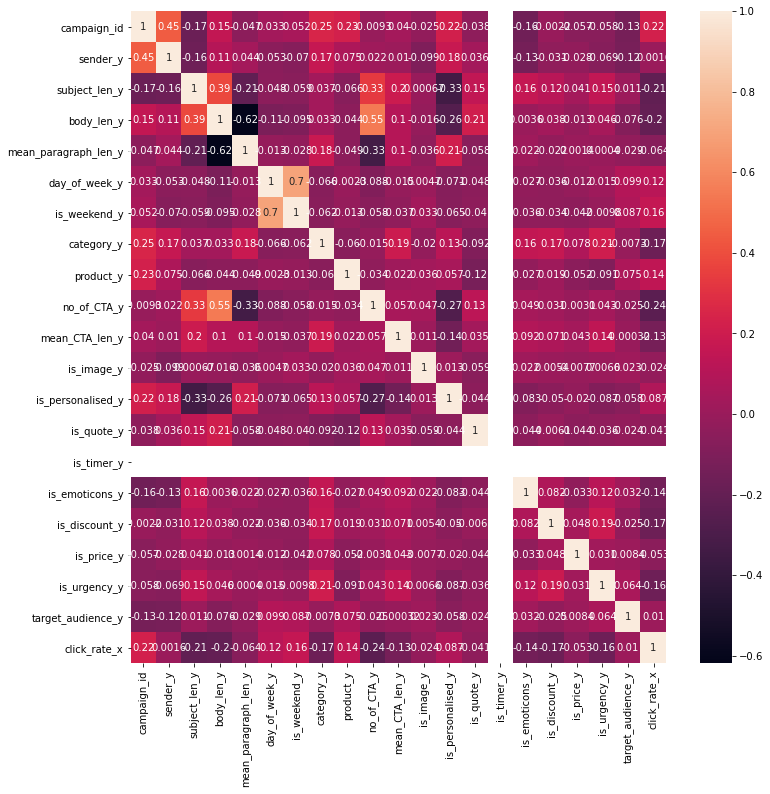

In [39]:
plt.figure(figsize=(12,12))    # spearman correlation
sns.heatmap(email[numericals].corr(method='spearman'),annot=True)

# Analysis part

<AxesSubplot:xlabel='is_personalised_y', ylabel='no_of_CTA_y'>

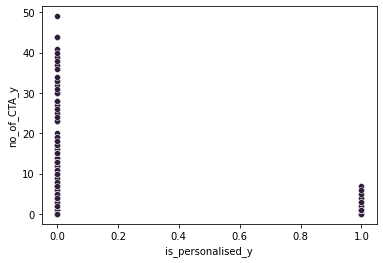

In [45]:
# In personalised email is very less and no. of CTA is 10.

sns.scatterplot(x="is_personalised_y",y="no_of_CTA_y",data=email)

<AxesSubplot:xlabel='is_discount_y', ylabel='click_rate_x'>

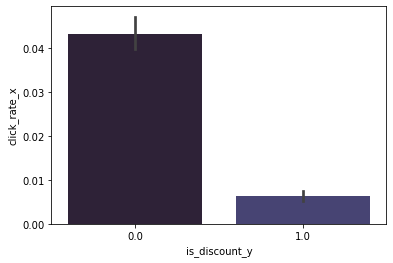

In [72]:
# click rate on discounted is very less. it is below 1.
sns.barplot(x="is_discount_y",y="click_rate_x",data=email)

<AxesSubplot:xlabel='target_audience_y', ylabel='click_rate_x'>

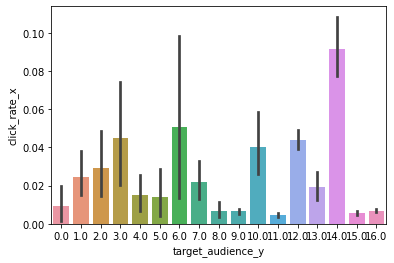

In [75]:
# in 14 target audience click rate is 9.
sns.barplot(x="target_audience_y",y="click_rate_x",data=email)